In [2]:
import pandas as pd 
import numpy as np
import scipy
import sklearn 
from sklearn import linear_model
import datetime
import datetime as datetime
import time

In [102]:
df = pd.read_csv('final_data_edited.csv') #This file name is slightly different from the one in Chris' notebook, this may be the reason it isn't working!
len(df)

1149

In [4]:
# we ommit maybe_count because it turns out it is exactly the same as interested_count\n",
X1 = df[['interested_count','no_reply_count','society_size','total_invited_count']]
y1 = df[['attendance_count']]

# Linear Regression

In [5]:
import statsmodels.api as sm #using statsmodels as opposed to sklearn due to regression output
    
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
print(results1.summary())

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.933e+31
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:58   Log-Likelihood:                 31417.
No. Observations:                1149   AIC:                        -6.283e+04
Df Residuals:                    1145   BIC:                        -6.281e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   2

### What does this mean? ,
Our model has estimated that there is a negative relationship (which is statistically significant) between the number of interested students and those that attend the events. This is somehwhat counter-intuitive, we have found that we would expect event attendance to *decrease* rather than increase as more people click interested.

We have also found that there is a positive relationship between total invites and event attendance, aswell as a negative relationship between how many people do not reply and event attendance. These however are fairly intuitive conclusions.


### Can we explain our results?
Let's assume that the only people who could potentially come to these events are the ones invited on Facebook. So for each event, we have some part of the student body that is 'eligible' to come to these events. Within that body there are 2 subsets of people, those who are 'favourable' to the event, and those who aren't. Those who aren't are the no-replyers, they do not really ever consider going whereas the 'favourable' group is comprised of people who click attending and interested -- these are the people that who are actually thinking about going to these events. You can only choose to click either going or interested in an event on Facebook, and so it is sort of like a zero sum game -- the more interested people in this subgroup, the less can be 'going' and vice versa.

### What can we draw from this?
**NEED TO ADD HERE**

# Clustering

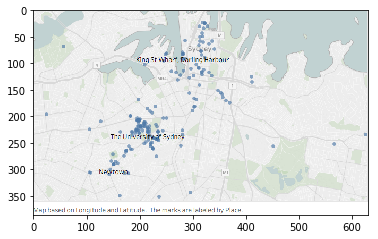

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('Small map.png')
imgplot = plt.imshow(img)
plt.show()

We can use clustering now to understand whether or not holding events on/off campus has effects on event attendance. What we have done here is seperate the data into two groups, those events that are held on campus and those that aren't. We will then run through a similar process as above to determine whether geographical location has some significant effect on group attendance.

In [7]:
zipdf = df.dropna(subset=['zip'], how='any') #dropping rows with no postcode
CampClass = np.where(zipdf['zip'] == 2006,1 ,0) #Creating an indicator vector
zipdf['Campus'] = CampClass #adding to existing dataframe"

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
X2 = zipdf[['interested_count','no_reply_count','society_size','total_invited_count', 'Campus']]
y2 = zipdf[['attendance_count']]
    
model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.477e+31
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 17448.
No. Observations:                 638   AIC:                        -3.489e+04
Df Residuals:                     633   BIC:                        -3.486e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   2

In [9]:
zipdf.to_csv('campus_data.csv')

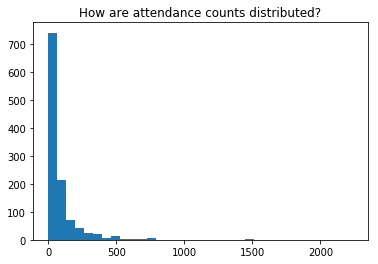

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['attendance_count'], bins='sqrt')  # bin choice via sqrt(n) provides something easy to understand visually
plt.title("How are attendance counts distributed?")
plt.show()

| Size  | Frequency   |  
|-------|-------------|
|0-86   |     422     |  
|       |             |
|87-172 |     107     |
|       |             |
|173-258|     38      |
|       |             |
|259-334|     27      | 
|       |             |

Here, we have listed the frequencies of events that fit into the specific categories that          are arranged by size.\n",

### What have we found?
These results suggest that there is a small but statistically significant effect that stems from holding events on campus. Our model is telling us that events held on campus tend to have a *lower* average attendance than those that are not.

The results seem to suggest that students do not prefer the convenience of on-campus events. Maybe the fact that the events *are* so **accesible** makes them a little less desireable, maybe people like to dress up, maybe people hate Manning Bar -- whatever it is it seems to be the case that off-campus events attract at least a few more people than the on-campus options. 

Note though, that a vast majority of events that are held by societies are relativley small. Most of our observations lie within that 0-86 individual attendance range. In other words, smaller events may exhibit different characterisitcs, and these effects may be a little different. In our next model we have controlled for this by only including data from the smallest bracket (0-86).

In [11]:
small_df = zipdf[df.attendance_count < 87]

X2 = small_df[['interested_count','no_reply_count','society_size','total_invited_count','Campus']]
y2 = small_df[['attendance_count']]

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.639e+29
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 11285.
No. Observations:                 422   AIC:                        -2.256e+04
Df Residuals:                     417   BIC:                        -2.254e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### What have we found?
If you're hosting a *small* event, there is no (statistical) difference between hosting the event on campus or off it. In short, if you're hosting something big, avoid spending time on campus, but if it's something small it could be worth keeping it local.

# Natural Language Processing (NLP)

In [12]:
SoldClass=np.zeros((len(df),1)) #creating indicator arrays
LimitClass=np.zeros((len(df),1))

In [13]:
for event in range(1, len(df)): #Looping through dataframe making sure we account for case sensitivity 
    if 'SOLD OUT' in df.loc[event,'description'] or 'Sold Out' in df.loc[event,'description'] or 'sold out' in df.loc[event,'description'] :
        SoldClass[event] = 1

In [14]:
for event in range(1, len(df)): #Looping through dataframe making sure we account for case sensitivity 
    if 'LIMIT' in df.loc[event,'description'] or 'Limit' in df.loc[event,'description'] or 'limit' in df.loc[event,'description'] :
        LimitClass[event] = 1
        

In [15]:
SoldClass = pd.DataFrame(SoldClass, columns=['Sold_Out']) #Turning arrays into dataframes so we can append
LimitClass = pd.DataFrame(LimitClass, columns=['Limit'])
df_NLP = pd.concat([SoldClass, LimitClass], axis=1) #important to set axis=1 so we concatenate horizontally

In [16]:
df = pd.concat([df,df_NLP], axis=1)

## Accessibility/Exclusivity

Earlier, we brought up the accessibility of events as a potential driver/inhibitor of event attendance, and so we want to explore this further. Using Python, we were able to trawl through the descriptions of all the events we had data for. We then 'tagged' those events which included the words 'Sold Out' and 'Limit' in order to shed some light on whether the accesbility of events (not in terms of geography, but in terms of exclusivity') have some affect on attendance.

In [17]:
X3 = df[['interested_count','no_reply_count','society_size','total_invited_count','Sold_Out','Limit']]
y3 = df[['attendance_count']]

model3 = sm.OLS(y3, X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.248e+30
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 30350.
No. Observations:                1149   AIC:                        -6.069e+04
Df Residuals:                    1143   BIC:                        -6.066e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   5

In [18]:
X4 = df[['interested_count','no_reply_count','society_size','total_invited_count','Sold_Out']]
y4 = df[['attendance_count']]

model4 = sm.OLS(y4, X4)
results4 = model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.355e+31
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:51:59   Log-Likelihood:                 31320.
No. Observations:                1149   AIC:                        -6.263e+04
Df Residuals:                    1144   BIC:                        -6.260e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   2

In [19]:
X5 = df[['interested_count','no_reply_count','society_size','total_invited_count','Limit']]
y5 = df[['attendance_count']]

model5 = sm.OLS(y5, X5)
results5 = model5.fit()
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.524e+32
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:52:00   Log-Likelihood:                 31921.
No. Observations:                1149   AIC:                        -6.383e+04
Df Residuals:                    1144   BIC:                        -6.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   1

### What have we found?

There are *no* significant results when controlling for exclusivity in the data (we have even included slightly different models in order to confirm this). So, it seems there are no salient benefits of making an event more exclusive as opposed to hosting free events.



# Start times

In [151]:
times = df['Start_time']

In [152]:
for i in range(0,len(df)):
    if (times[i].endswith('+1100')) | (times[i].endswith('+1000')): 
        times[i] = times[i][:-5]

for i in range(0,len(df)):
    if times[i].endswith('+'):
        times[i] = times[i][:-1]

In [115]:
from collections import Counter
time_counts = Counter(times) #counting frequencies 

In [139]:
Dict_times = time_counts.items()

In [147]:
times_null , freq_times = zip(*Dict_times) #'unzipping' the tuple -- seperating frequencies from times

In [161]:
for i in range(0,len(df)):
    if (times[i].endswith('+1100')) | (times[i].endswith('+1000')) | (times[i].endswith('+0200')) | (times[i].endswith('+0800')) | (times[i].endswith('+0700')): 
        times[i] = times[i][:-5]

for i in range(0,len(df)):
    if times[i].endswith('+'):
        times[i] = times[i][:-1]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
Counter((times)).values() # counts the elements' frequency set(times)

51

In [180]:
times_data = [(set(times)),(Counter((times)).values())]

df_times = pd.DataFrame(times_data)
df_times = df_times.T
df_times.columns = ['Times', 'Frequency']


In [181]:
df_times_trimmed = df_times[df_times['Frequency'] > 25] #only frequencies > 25

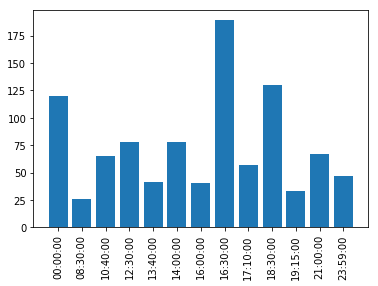

In [182]:
trimmed_x = df_times_trimmed['Times']
trimmed_y = df_times_trimmed['Frequency']

plt.bar(trimmed_x,trimmed_y)
plt.xticks(rotation=90)
plt.show()

# Days of the week

In [27]:
##RESTRICTING TIME
#import datetime
#from datetime import datetime
#import datetime


#restricting times

#lower_lim = datetime.time(hour = 18, minute = 1, second = 1)
#upper_lim = datetime.time(hour = 8, minute = 59, second = 59)


#times_indi = np.zeros((len(df),1))
#times_indi = pd.DataFrame(times_indi, columns =['In Session'])


#for i in range(1,len(df)):
    if upper_lim < datetime.datetime.strptime(df['Start_time'].iloc[i],'%H:%M:%S').time():
        times_indi['In Session'] = 1


ValueError: unconverted data remains: +1100

In [204]:
DaysClass = np.zeros((len(df),1))    #creating 'Days' column
DaysClass = pd.DataFrame(DaysClass, columns = ['Days'])            

In [205]:
for i in range(0,len(df)):
        DaysClass['Days'].iloc[i] = datetime.strptime(df['Date'].iloc[i],'%Y-%m-%d').strftime('%A')

In [206]:
df = pd.concat([df, DaysClass], axis=1) 

In [207]:
day_counts = Counter(df['Days'])
Dict_days = day_counts.items()
days , freq_days = zip(*Dict_days)

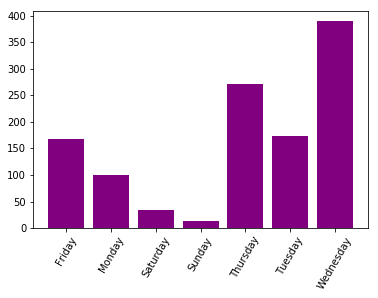

In [219]:
plt.bar(days,freq_days,color='purple')
plt.xticks(rotation=60)
plt.show()

In [220]:
days

('Wednesday', 'Thursday', 'Tuesday', 'Sunday', 'Saturday', 'Friday', 'Monday')

In [200]:
def calc_mean(day):      #calculating the mean of a given day
    day_mean = df['attendance_count'][df.Days == day].sum()/len(df[df.Days == day])
    return int(day_mean) #using integers because it makes more sense

In [196]:
day_labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [213]:
day_means=[0,0,0,0,0,0,0]

for i in range(0,len(day_labels)): #applying function to each day
    day_means[i] = calc_mean(day_labels[i])

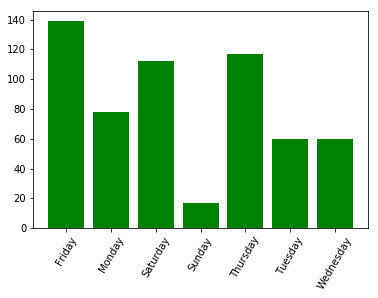

In [223]:
plt.bar(day_labels, day_means, color='green')
plt.xticks(rotation=60)
plt.show()

In [ ]:
#weekend/weekdays analysis

weekdays = df[(df.Days == 'Saturday') | (df.Days == 'Sunday')]
weekends = df[(df.Days == 'Monday') | (df.Days == 'Tuesday') | (df.Days == 'Wednesday') | (df.Days == 'Thursday') | (df.Days == 'Friday')]



In [ ]:
weekend_mean = int(np.mean(weekends['attendance_count']))
weekday_mean = int(np.mean(weekdays['attendance_count']))

wknd_labels = ['Weekend','Weekday']
wknd_means = [weekend_mean, weekday_mean]

In [ ]:
plt.bar(wknd_labels,wknd_means)
plt.show()

# Pub Crawls, Alcohol and Food

## Alcohol and Food

A substantial ammount of events are related to food and alcohol in order to boost exposure, increase membership and ensure that socities remain active. But how effective are these? Are those free lunches really worth it? We have firstly, using Natural Language Processing (NLP) we have split the data into the following categories: Those events that involve food (presumeably this is mostly *free* food), those events that involve alcohol, and those events which include both. Below, we have a bar chart which graphs the average attendance count for each of these categories.

In [184]:
#Searching for'Pub Crawl' in descriptions  ##pubcrawls

PubClass=np.zeros((len(df),1))


for event in range(1, len(df)): #Looping through dataframe making sure we account for case sensitivity 
    if (   'Pub Crawl' in df.loc[event,'description']  
        or 'PUB CRAWL' in df.loc[event,'description'] 
        or 'PUBCRAWL'  in df.loc[event,'description'] 
        or 'pubcrawl'  in df.loc[event,'description'] 
        or 'pub crawl' in df.loc[event,'description']
         
        or 'Pub Crawl' in df.loc[event,'event_name'] 
        or 'PUBCRAWL'  in df.loc[event,'event_name'] 
        or 'pubcrawl'  in df.loc[event,'event_name']
        or 'pub crawl' in df.loc[event,'event_name']):
            PubClass[event] = 1
            
PubClass = pd.DataFrame(PubClass, columns=['Pub Crawl'])
df = pd.concat([df, PubClass], axis=1)


In [185]:
datetime.strptime(df['Date'].iloc[1], '%Y-%m-%d').weekday

<function datetime.weekday>

In [186]:
df_catering = pd.read_csv('Alcohol+Food.csv') #Food and alcohol indicator

In [187]:
mat = [df, df_catering['Food available'], df_catering['Alcohol available']]

df = pd.concat(mat, axis = 1)  #adding food/alcohol dataframe indicators

BothClass=np.zeros((len(df),1))

for i in range(1,len(df)):
    if (df['Food available'].iloc[i] == 1 
    & df['Alcohol available'].iloc[i] == 1):
        BothClass[i] = 1
        
BothClass = pd.DataFrame(BothClass, columns=['Both'])
df = pd.concat([df, BothClass], axis=1)

In [188]:
#added extra or condition because pub crawls weren't getting picked up

all_df  = df
food_df = df[(df['Food available'] == 1) & (df['Alcohol available'] != 1)] 
alco_df = df[(df['Alcohol available'] == 1) & (df['Food available'] != 1) | (df['Pub Crawl'] == 1)]
both_df = df[(df['Alcohol available'] == 1) & (df['Food available'] == 1)]

In [189]:
all_mean = np.mean(all_df['attendance_count'])
food_mean = np.mean(food_df['attendance_count'])
alco_mean = np.mean(alco_df['attendance_count'])
both_mean = np.mean(both_df['attendance_count'])

catering_means = [all_mean, food_mean, alco_mean, both_mean]
catering_labels = ['Entire sample','Just food', 'Just alcohol', 'Both' ]

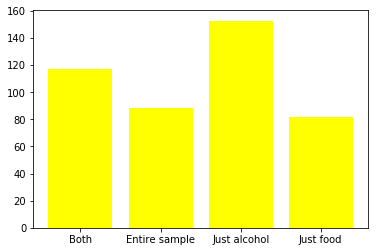

In [224]:
plt.bar(catering_labels, catering_means, color='yellow')
plt.show()

In [225]:
X6 = df[['interested_count','no_reply_count','society_size','total_invited_count','Food available','Alcohol available']]
y6 = df[['attendance_count']]

model6 = sm.OLS(y6, X6)
results6 = model6.fit()
print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:       attendance_count   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.417e+31
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:45:13   Log-Likelihood:                 30661.
No. Observations:                1149   AIC:                        -6.131e+04
Df Residuals:                    1143   BIC:                        -6.128e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
interested_count       -2.0000   4

## Pub Crawls

Pub Crawls are a popular event option. One general observation was that Pub Crawls seemed to be fairly consistent and uniform in that most socities don't hold these ad-hoc, these are for example; 'Welcome back drinks' or annual dress up events which presumeably would happen regardless of potential attendance. As a result we have decided not to explore *if* these sorts of events drive attendance, but rather *which* events have drawn the biggest crowds. 

We firstly looked at location. Using NLP we were able to indicate whether certain events were indeed pub crawls, and then were able to split the data into 3 categories, pub crawls beginning in Newtown, pub crawls beginning on Campus (generally Hermann's/Manning, but we have used post codes so places like The Royal count too) and pub crawls than begin elsewhere. 

In [191]:
#Kings cross vs elsewhere

pc_df = df.dropna(subset=['zip'], how='any')


pc_df = df[df['Alcohol available'] == 1 | (df['Both'] == 1)]

In [192]:
newtown_df = pc_df[pc_df.zip == 2042]
campus_drinks = pc_df[pc_df.zip == 2006]
elsewhere_df = pc_df[(pc_df.zip != 2006) & (pc_df.zip != 2042)]

In [193]:
NewtownMeans = [np.mean(newtown_df['attendance_count']), np.mean(elsewhere_df['attendance_count']), np.mean(campus_drinks['attendance_count'])]
NewtownLabels = ['Newtown', 'Elsewhere','Campus']

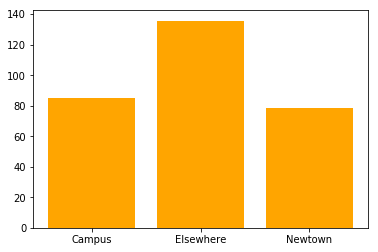

In [222]:
plt.bar(NewtownLabels, NewtownMeans, color='orange')
plt.show()

In [233]:
new_else = scipy.stats.ttest_ind(newtown_df['attendance_count'], 
                                 elsewhere_df['attendance_count'], axis=0, equal_var=True, nan_policy='propagate')

new_camp = scipy.stats.ttest_ind(newtown_df['attendance_count'], 
                                 campus_drinks['attendance_count'], axis=0, equal_var=True, nan_policy='propagate')

camp_else = scipy.stats.ttest_ind(elsewhere_df['attendance_count'], 
                                 campus_drinks['attendance_count'], axis=0, equal_var=True, nan_policy='propagate')


In [241]:
camp_else #only camp else is statistically significant

Ttest_indResult(statistic=1.9923416999565204, pvalue=0.047056240443526576)